# Conversacion Gemini

Ejercicios

https://aistudio.google.com/

1. Seleccionar Modelo - Gemini 2.0 Flash
2. Click en Systems instructions

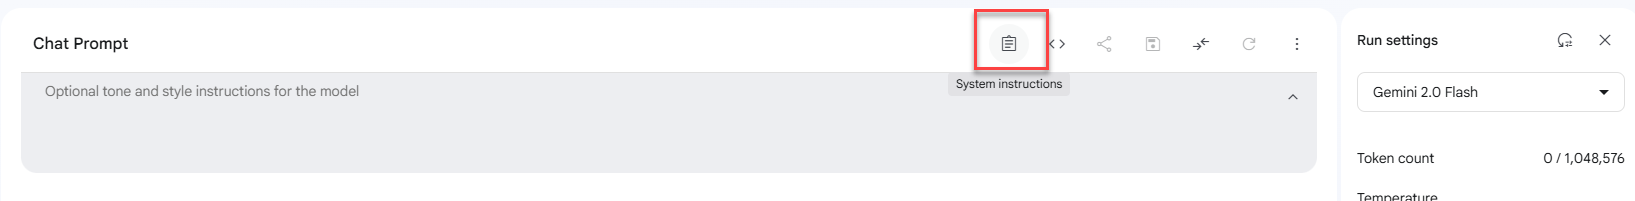

Pegar el texto en system instructions: "Eres un asistente de atención al cliente especializado en calzado deportivo. Respondes de forma clara, empática y rápida, ayudando con dudas sobre tallas, modelos, cambios y devoluciones."

Pegar en Start typing a prompt: "Hola, me llegaron unas zapatillas que pedí online, pero no me quedaron. ¿Puedo cambiarlas?"

Ejecuta el prompt y analiza el resultado

Borra el system message y ejecuta nuevamente el prompt. Que diferencias notas?

In [ ]:
%pip install openai
from openai import OpenAI
from google.colab import userdata
import os
import pandas as pd

In [ ]:
#Accedemos a gemini
client = OpenAI(
    # This is the default and can be omitted
    api_key=userdata.get('GOOGLE_API_KEY'),
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)


### Importamos el dataset de productos

In [ ]:
df = pd.read_csv("https://storage.googleapis.com/tallerdp_publico/taller02/products.csv")

###Seleccionamos los 10 primeros productos
- No nulos
- No repetidos

In [ ]:
productos = df["product_name"].dropna().unique()[:10]

Mostramos en pantalla el producto en el indice: 6

In [ ]:
print(productos[6])

###Analiza la siguiente estructura:

*   Revisa cuales roles se estan utilizando
*   Que parte del codigo se esta utilizando como "System Prompt"
*   A que tecnica de prompting se asemeja





In [ ]:
conversation_history = [
    {
        "role": "system",
        "content": "Eres un asistente experto en retail que clasifica productos por tipo: tenis, sandalia, lentes, mochila, camiseta, chamarra. Responde solo con una palabra."
    },
     {
        "role": "user",
        "content": "Producto: Sandalias Onboard Dore Mujer"
    },
    {
        "role": "assistant",
        "content": "sandalia"
    },
    {
        "role": "user",
        "content": "Producto: Lentes Carrera 314/S"
    },
    {
        "role": "assistant",
        "content": "lentes"
    },
    {
        "role": "user",
        "content": "Producto: Tenis adidas Duramo SL2 Joven"
    },
    {
        "role": "assistant",
        "content": "tenis"
    }
]


**conversation_history**: Simula un intercambio de mensajes entre el usuario y el asistente para mostrar al modelo como debería responder mediante ejemplos de conversacion

### Iniciamos la sesion de chat con gemini
- Se envia como parametro **conversation_history**: proporciona el contexto inicial al modelo simulando un historial de conversación.
- La variable chat almacena la sesión activa, que puede seguir utilizándose. Esta sesión mantiene el contexto a lo largo de las interacciones, permitiendo respuestas coherentes y consistentes.

In [ ]:
def few_shot(message):
  conversation_history.append({"role": "user", "content": message})
  response = client.chat.completions.create(
  model="gemini-2.0-flash",
  messages=conversation_history)
  conversation_history.append({"role": "assistant", "content": response.choices[0].message.content})
  return response.choices[0].message.content


few_shot("Producto: Lentes Carrera 314/S")


### Enviamos al modelo un mensaje  
- Es un producto del dataset (el indice 6)
- Es el "prompt" inicial con el cual obtendremos una respuesta


In [ ]:
respuesta = few_shot("Producto: Tenis Under Armour Assert 10 Niño")

###Ahora obtenemos la respuesta
Analiza el resultado:

In [ ]:
print(f"Asistente: {respuesta}")

###Recorremos los 10 productos uno por uno para obtener la respuesta de gemini:

In [ ]:
for i, nombre in enumerate(productos):
    response = few_shot(f"Producto: {nombre}")
    print(f" Producto: {nombre}")
    print(f" Categoría: {response.strip().lower()}\n")